In [73]:
from MDbrew.opener import DumpOpener
from MDbrew.tools import Extractor, timeCount
data = DumpOpener('./test.file')
# pos = Extractor(data=data).get_position_db(type_=1)
pos = Extractor(data=data).get_position_db(type_=2)
ss = data.get_system_size()

 STEP (Done)			->  1.33 s ✓e
 STEP (Done)			->  0.00 s ✓
 STEP (Done)			->  0.64 s ✓n_db
 STEP (Done)			->  0.00 s ✓size


In [90]:
from test_MDbrew.RDF2 import RDF
rdf = RDF(pos, pos, ss)
rdf2 = RDF(pos, pos, ss)
rdf.get_rdf(resolution=20000)
rdf2.get_rdf(resolution=10000)

 RDF  (STEP) : 100%|################| 401/401 [00:12<00:00, 32.55it/s]


array([0.        , 0.        , 0.        , ..., 0.95388257, 0.95610585,
       0.96702991])

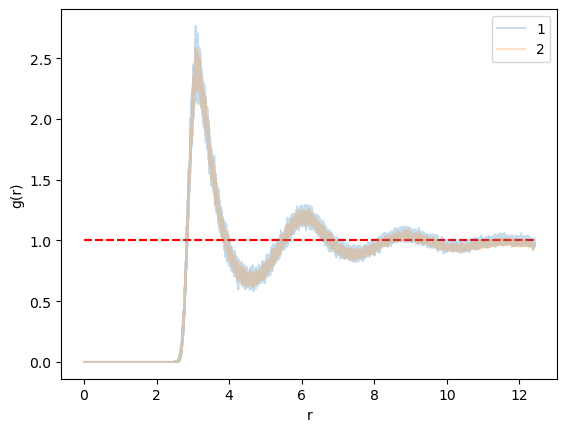

In [91]:
import numpy as np
import matplotlib.pyplot as plt
rdf.plot_g_r(label = '1', alpha=0.25)
rdf2.plot_g_r(label='2', alpha=0.25)
plt.legend()